In [142]:
# Load libraries

# pandas and numpy
import pandas as pd
import numpy as np

# data scaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# data preparation
from sklearn.feature_selection import VarianceThreshold 
from sklearn.pipeline import Pipeline

# split the data
from sklearn.model_selection import train_test_split

# feature selection
from sklearn.feature_selection import RFE

# model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupShuffleSplit

# predictive models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# plot data
import matplotlib
import matplotlib.pyplot as plt


# metrics results
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.feature_selection import mutual_info_classif


In [146]:
# imoport dataframe
df = pd.read_csv('h2_preprocessed.csv')

# first look at the dataframe
df.head()

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,DistributionChannel,...,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,1,88,July,0,4,2,0.0,0,BB,TA/TO,...,0,0,A,0,No Deposit,0,Transient,76.5,0,1
1,1,65,July,0,4,1,0.0,0,BB,TA/TO,...,0,0,A,0,No Deposit,0,Transient,68.0,0,1
2,1,92,July,2,4,2,0.0,0,BB,TA/TO,...,0,0,A,0,No Deposit,0,Transient,76.5,0,2
3,1,100,July,0,2,2,0.0,0,BB,TA/TO,...,0,0,A,0,No Deposit,0,Transient,76.5,0,1
4,1,79,July,0,3,2,0.0,0,BB,TA/TO,...,0,0,A,0,No Deposit,0,Transient,76.5,0,1


In [147]:
# Creates new column IsDuplicated
df['IsDuplicated'] = np.where(df.duplicated() == True, 1, 0)
df['IsDuplicated'].sum()

27835

In [148]:
# One hot encode categorical features
ohc_features = ['ArrivalDateMonth', 'Meal', 'DistributionChannel', 'DepositType', 'CustomerType', 'ReservedRoomType']
ohc = OneHotEncoder(sparse=False)
df_ohc = pd.DataFrame(ohc.fit_transform(df[ohc_features]),
                      index=df.index,
                      columns=ohc.get_feature_names(ohc_features))
df = pd.concat([df.loc[:, df.columns.drop(ohc_features)], df_ohc], axis=1)

In [149]:
df

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,...,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G
0,1,88,0,4,2,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,65,0,4,1,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,92,2,4,2,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,100,0,2,2,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,79,0,3,2,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76195,0,21,2,5,2,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
76196,0,23,2,5,2,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
76197,0,102,2,5,3,0.0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76198,0,34,2,5,2,0.0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [150]:
# 1. Split the data into training and testing sets

# define features and target variables
X = df.drop('IsCanceled',axis=1)
y = df['IsCanceled']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['IsDuplicated'])

In [151]:
X_train = X_train.drop('IsDuplicated',axis=1)
X_test = X_test.drop('IsDuplicated',axis=1)

Decision Tree Classifier -> accuracy mean: 0.8086, std: 0.0054
Gaussian Naive Bayes -> accuracy mean: 0.7432, std: 0.0031
Gradient Boosting -> accuracy mean: 0.8123, std: 0.0039
AdaBoost -> accuracy mean: 0.807, std: 0.0048
Random Forest -> accuracy mean: 0.8484, std: 0.0063


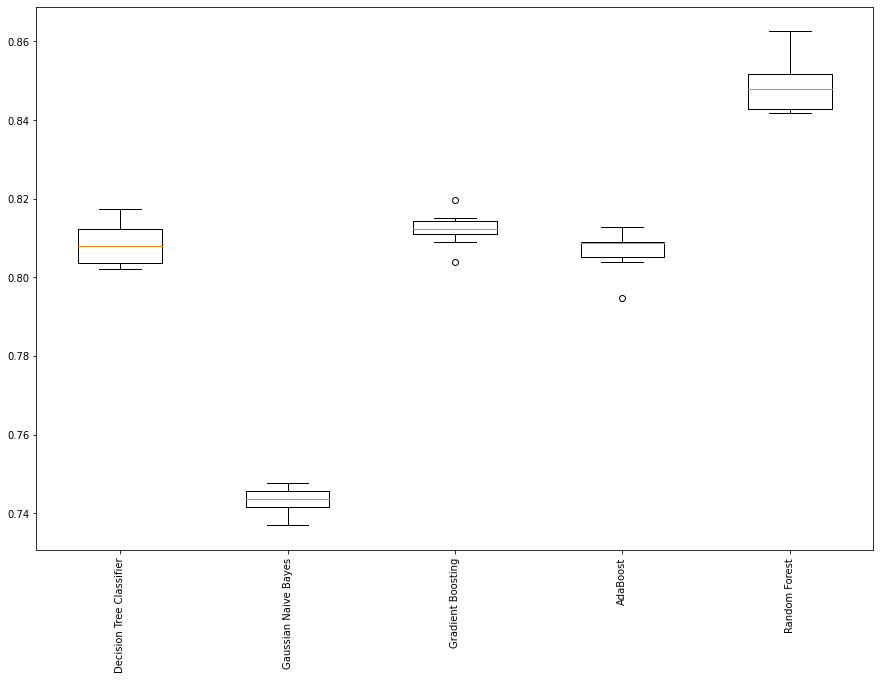

In [154]:
# 2. Create a baseline of performance and spot-check a number of different algorithms.
# select a suite of different algorithms capable of working with a binry classification problem.
# the algorithms all use default tuning parameters.

# 2.1. Evaluate algorithms using 'accuracy'

# define scaler and variance threshold           
scaler = StandardScaler()
var = VarianceThreshold(0.1)
metric = 'accuracy'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('v', var),('s', scaler),('m',DecisionTreeClassifier())])),
('Gaussian Naive Bayes', Pipeline([('v', var),('s', scaler),('NB', GaussianNB())])),
('Gradient Boosting', Pipeline([('v', var),('s', scaler),('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('v', var),('s', scaler),('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('v', var),('s', scaler),('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean(), 4)
    scoring_std = round(cv_results.std() , 4)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}, std: {}".format(name, metric, scoring_mean, scoring_std)
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

Decision Tree Classifier -> precision mean: 0.7683, std: 0.0082
Gaussian Naive Bayes -> precision mean: 0.9505, std: 0.0036
Gradient Boosting -> precision mean: 0.8722, std: 0.0064
AdaBoost -> precision mean: 0.852, std: 0.0079
Random Forest -> precision mean: 0.8557, std: 0.0096


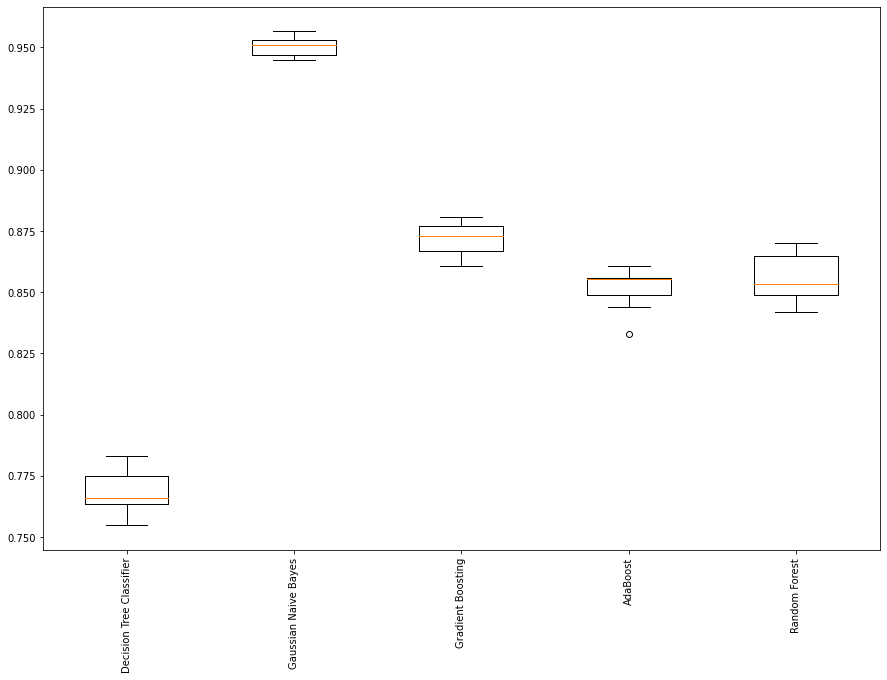

In [155]:
# 2.2. Evaluate algorithms using 'precision'

# define scaler and variance threshold           
scaler = StandardScaler()
var = VarianceThreshold(0.1)
metric = 'precision'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('v', var),('s', scaler),('m',DecisionTreeClassifier())])),
('Gaussian Naive Bayes', Pipeline([('v', var),('s', scaler),('NB', GaussianNB())])),
('Gradient Boosting', Pipeline([('v', var),('s', scaler),('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('v', var),('s', scaler),('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('v', var),('s', scaler),('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean(), 4)
    scoring_std = round(cv_results.std() , 4)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}, std: {}".format(name, metric, scoring_mean, scoring_std)
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

Decision Tree Classifier -> f1 mean: 0.7719, std: 0.0055
Gaussian Naive Bayes -> f1 mean: 0.5724, std: 0.0068
Gradient Boosting -> f1 mean: 0.7434, std: 0.0061
AdaBoost -> f1 mean: 0.7399, std: 0.0067
Random Forest -> f1 mean: 0.8095, std: 0.0078


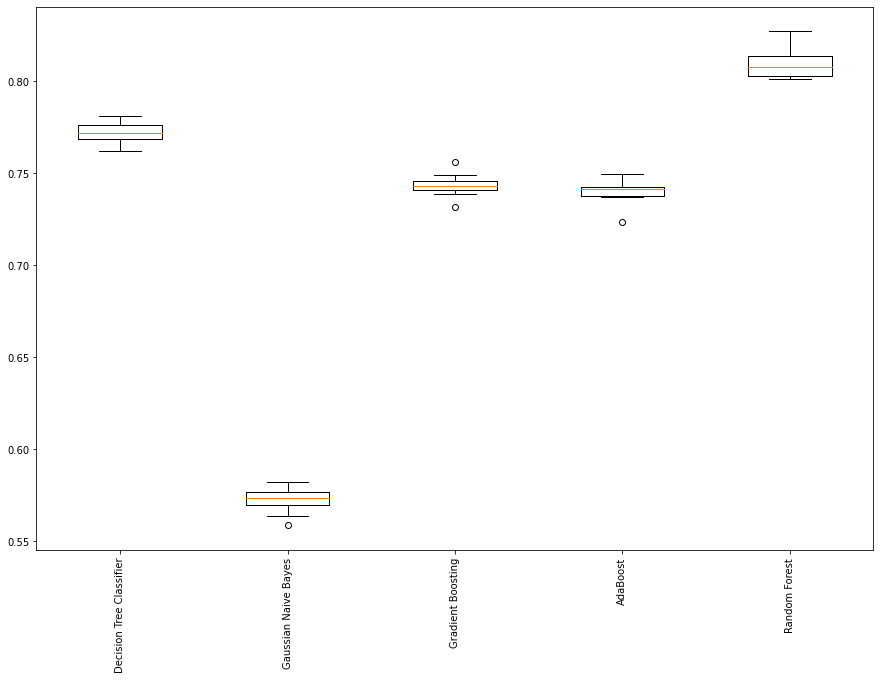

In [156]:
# 2.3. Evaluate algorithms using 'f1'

# define scaler and variance threshold           
scaler = StandardScaler()
var = VarianceThreshold(0.1)
metric = 'f1'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('v', var),('s', scaler),('m',DecisionTreeClassifier())])),
('Gaussian Naive Bayes', Pipeline([('v', var),('s', scaler),('NB', GaussianNB())])),
('Gradient Boosting', Pipeline([('v', var),('s', scaler),('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('v', var),('s', scaler),('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('v', var),('s', scaler),('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean(), 4)
    scoring_std = round(cv_results.std() , 4)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}, std: {}".format(name, metric, scoring_mean, scoring_std)
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

>2 0.754 (0.006)
>3 0.779 (0.005)
>4 0.785 (0.004)
>5 0.787 (0.004)
>6 0.802 (0.010)
>7 0.808 (0.012)
>8 0.826 (0.006)
>9 0.830 (0.005)
>10 0.837 (0.005)
>11 0.840 (0.006)
>12 0.842 (0.006)
>13 0.842 (0.005)
>14 0.844 (0.007)
>15 0.846 (0.006)
>16 0.848 (0.007)


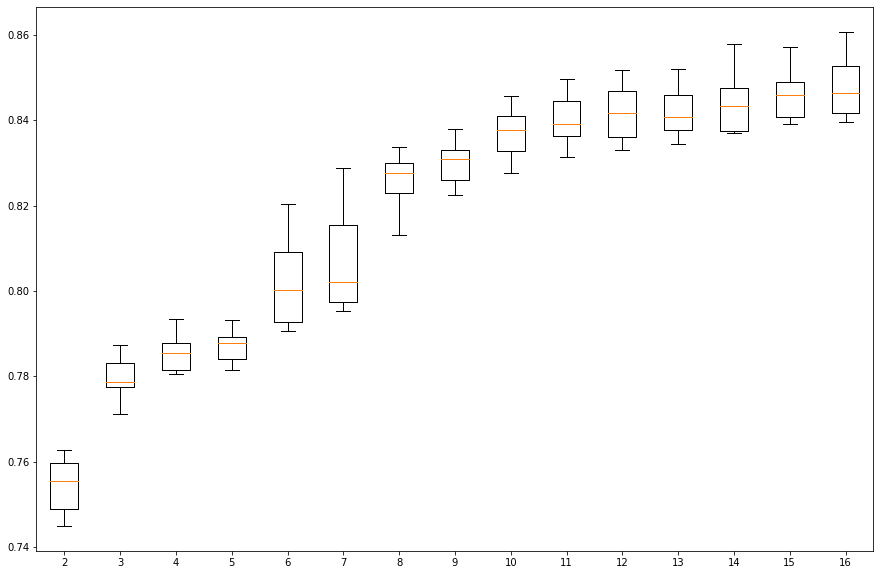

In [157]:
# 3. Explore the number of features for RFE
# check performance for the model with the best results from last cell

# There are many algorithms that can be used in the core RFE, 
# as long as they provide some indication of variable importance. 
# Most decision tree algorithms are likely to report the same general trends in feature importance.

# get a list of models to evaluate
def get_models():
    models = dict()
    
    for i in range(2, 17):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        steps = [('var', VarianceThreshold(0.1)),('sc', StandardScaler()),('fs',rfe),('m',model)]
        models[str(i)] = Pipeline(steps=steps)
        
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.show()

In [158]:
# 4. Report which features were selected using RFE 

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)

# fit RFE
rfe.fit(X_train, y_train)

# get and save selected features
features_bool = rfe.support_
selected_features = X_train.iloc[:, features_bool].columns

# ghow selected features
print('RFE Selected features:')
for i in selected_features:
    print('-', i)

RFE Selected features:
- LeadTime
- StaysInWeekendNights
- StaysInWeekNights
- Adults
- PreviousCancellations
- PreviousBookingsNotCanceled
- BookingChanges
- ADR
- TotalOfSpecialRequests
- DistributionChannel_TA/TO
- DepositType_No Deposit     
- CustomerType_Transient


In [160]:
coef = mutual_info_classif(X_train.values,y_train.values, discrete_features=True)

mutual_feature_importances = pd.DataFrame(coef, index = X_train.columns,
                                          columns=['importance']).sort_values('importance', ascending=False)
#pd.Series(data = coef, index = X_train.columns)
mutual_feature_importances

C:\Users\DF010760\Anaconda3\envs\Deep_Learning\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


,importance
DepositType_Non Refund,0.166541
DepositType_No Deposit,0.166354
ADR,0.133116
LeadTime,0.102079
TotalOfSpecialRequests,0.059922
PreviousCancellations,0.050194
BookingChanges,0.022458
DaysInWaitingList,0.019530
DistributionChannel_TA/TO,0.014930
RequiredCarParkingSpaces,0.013529


In [161]:
# 5. Filter X_train and X_test with the selected features
X_train_sf = X_train[selected_features]
X_test_sf = X_test[selected_features]

In [162]:
# Random Forest model for features importance
scaler = StandardScaler().fit(X_train_sf)
rescaled_X_train = scaler.transform(X_train_sf)
model = RandomForestClassifier()
model.fit(rescaled_X_train, y_train)

RandomForestClassifier()

Feature importance scores
LeadTime                       0.274573
ADR                            0.246130
DepositType_No Deposit         0.192512
TotalOfSpecialRequests         0.074499
PreviousCancellations          0.048123
StaysInWeekNights              0.045875
CustomerType_Transient         0.028099
BookingChanges                 0.025637
StaysInWeekendNights           0.021701
DistributionChannel_TA/TO      0.019876
Adults                         0.017525
PreviousBookingsNotCanceled    0.005452
dtype: float64


<AxesSubplot:>

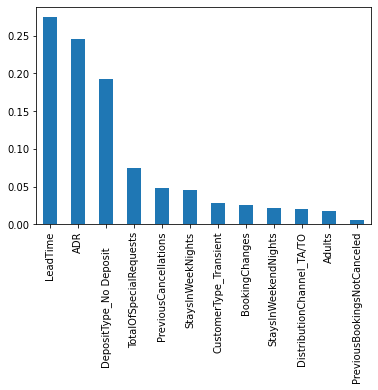

In [163]:
# 7. Report the importance of the selected features

# create pd.Series with the featues importances
features_importance = pd.Series(data=model.feature_importances_, index=X_train_sf.columns)

# sort values
features_importance.sort_values(ascending=False, inplace=True)

# print features importance 
print('Feature importance scores')
print(features_importance)

# print barplot
plt.title = "Features importance"
features_importance.plot.bar()

In [164]:
# 6. finilize model and check results
scaler = StandardScaler().fit(X_train_sf)
rescaled_X_train = scaler.transform(X_train_sf)
model = RandomForestClassifier()
model.fit(rescaled_X_train, y_train)

# estimate accuracy on train dataset
rescaled_X_test = scaler.transform(X_test_sf)
RFC_y_train_pred = model.predict(rescaled_X_train)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, RFC_y_train_pred))
print('- Precision score:', precision_score(y_train, RFC_y_train_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_train, RFC_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, RFC_y_train_pred))

RFC_y_test_pred = model.predict(rescaled_X_test)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, RFC_y_test_pred))
print('- Precision score:', precision_score(y_test, RFC_y_test_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_test, RFC_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, RFC_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.9872703412073491
- Precision score: 0.9893138801261829

- Confusion matrix:
 [[35095   271]
 [  505 25089]]

- Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     35366
           1       0.99      0.98      0.98     25594

    accuracy                           0.99     60960
   macro avg       0.99      0.99      0.99     60960
weighted avg       0.99      0.99      0.99     60960

___________________________________________________________________________________________________________
 TEST - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0

In [165]:
# 6. finilize model and check results
scaler = StandardScaler().fit(X_train_sf)
rescaled_X_train = scaler.transform(X_train_sf)
model = GradientBoostingClassifier()
model.fit(rescaled_X_train, y_train)

# estimate accuracy on train dataset
rescaled_X_test = scaler.transform(X_test_sf)
GBC_y_train_pred = model.predict(rescaled_X_train)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Gradient Boosting Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, GBC_y_train_pred))
print('- Precision score:', precision_score(y_train, GBC_y_train_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_train, GBC_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, GBC_y_train_pred))

GBC_y_test_pred = model.predict(rescaled_X_test)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Gradient Boosting Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, GBC_y_test_pred))
print('- Precision score:', precision_score(y_test, GBC_y_test_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_test, GBC_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, GBC_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Gradient Boosting Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.8105971128608924
- Precision score: 0.873339002870203

- Confusion matrix:
 [[32983  2383]
 [ 9163 16431]]

- Classification report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85     35366
           1       0.87      0.64      0.74     25594

    accuracy                           0.81     60960
   macro avg       0.83      0.79      0.80     60960
weighted avg       0.82      0.81      0.80     60960

___________________________________________________________________________________________________________
 TEST - Gradient Boosting Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy s

In [166]:
# 6. finilize model and check results
scaler = StandardScaler().fit(X_train_sf)
rescaled_X_train = scaler.transform(X_train_sf)
model = DecisionTreeClassifier()
model.fit(rescaled_X_train, y_train)

# estimate accuracy on train dataset
rescaled_X_test = scaler.transform(X_test_sf)
DT_y_train_pred = model.predict(rescaled_X_train)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Decision Tree Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, DT_y_train_pred))
print('- Precision score:', precision_score(y_train, DT_y_train_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_train, DT_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, DT_y_train_pred))

DT_y_test_pred = model.predict(rescaled_X_test)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Decision Tree Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, DT_y_test_pred))
print('- Precision score:', precision_score(y_test, DT_y_test_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_test, DT_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, DT_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Decision Tree Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.9873031496062992
- Precision score: 0.9919917538851887

- Confusion matrix:
 [[35164   202]
 [  572 25022]]

- Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     35366
           1       0.99      0.98      0.98     25594

    accuracy                           0.99     60960
   macro avg       0.99      0.99      0.99     60960
weighted avg       0.99      0.99      0.99     60960

___________________________________________________________________________________________________________
 TEST - Decision Tree Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0

In [167]:
# 6. finilize model and check results
scaler = StandardScaler().fit(X_train_sf)
rescaled_X_train = scaler.transform(X_train_sf)
model = AdaBoostClassifier()
model.fit(rescaled_X_train, y_train)

# estimate accuracy on train dataset
rescaled_X_test = scaler.transform(X_test_sf)
AB_y_train_pred = model.predict(rescaled_X_train)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - AdaBoost Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, AB_y_train_pred))
print('- Precision score:', precision_score(y_train, AB_y_train_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_train, AB_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, AB_y_train_pred))

AB_y_test_pred = model.predict(rescaled_X_test)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST  - AdaBoost Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, AB_y_test_pred))
print('- Precision score:', precision_score(y_test, AB_y_test_pred))
print("\n- Confusion matrix:\n", confusion_matrix(y_test, AB_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, AB_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - AdaBoost Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.8067257217847769
- Precision score: 0.8607019743027264

- Confusion matrix:
 [[32699  2667]
 [ 9115 16479]]

- Classification report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85     35366
           1       0.86      0.64      0.74     25594

    accuracy                           0.81     60960
   macro avg       0.82      0.78      0.79     60960
weighted avg       0.82      0.81      0.80     60960

___________________________________________________________________________________________________________
 TEST  - AdaBoost Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.80564304

In [168]:
#Accuracy
AB_acc_train = np.round(accuracy_score(y_train, AB_y_train_pred)*100,0)
RFC_acc_train = np.round(accuracy_score(y_train, RFC_y_train_pred)*100,0)
DT_acc_train = np.round(accuracy_score(y_train, DT_y_train_pred)*100,0)
GBC_acc_train = np.round(accuracy_score(y_train, GBC_y_train_pred)*100,0)
AB_acc_test = np.round(accuracy_score(y_test, AB_y_test_pred)*100,0)
RFC_acc_test = np.round(accuracy_score(y_test, RFC_y_test_pred)*100,0)
DT_acc_test = np.round(accuracy_score(y_test, DT_y_test_pred)*100,0)
GBC_acc_test = np.round(accuracy_score(y_test, GBC_y_test_pred)*100,0)

In [169]:
# Precision
AB_prec_train = np.round(precision_score(y_train, AB_y_train_pred)*100,0)
RFC_prec_train = np.round(precision_score(y_train, RFC_y_train_pred)*100,0)
DT_prec_train = np.round(precision_score(y_train, DT_y_train_pred)*100,0)
GBC_prec_train = np.round(precision_score(y_train, GBC_y_train_pred)*100,0)
AB_prec_test = np.round(precision_score(y_test, AB_y_test_pred)*100,0)
RFC_prec_test = np.round(precision_score(y_test, RFC_y_test_pred)*100,0)
DT_prec_test = np.round(precision_score(y_test, DT_y_test_pred)*100,0)
GBC_prec_test = np.round(precision_score(y_test, GBC_y_test_pred)*100,0)

In [170]:
#F1 score
AB_f1_train = np.round(f1_score(y_train, AB_y_train_pred)*100,0)
RFC_f1_train = np.round(f1_score(y_train, RFC_y_train_pred)*100,0)
DT_f1_train = np.round(f1_score(y_train, DT_y_train_pred)*100,0)
GBC_f1_train = np.round(f1_score(y_train, GBC_y_train_pred)*100,0)
AB_f1_test = np.round(f1_score(y_test, AB_y_test_pred)*100,0)
RFC_f1_test = np.round(f1_score(y_test, RFC_y_test_pred)*100,0)
DT_f1_test = np.round(f1_score(y_test, DT_y_test_pred)*100,0)
GBC_f1_test = np.round(f1_score(y_test, GBC_y_test_pred)*100,0)

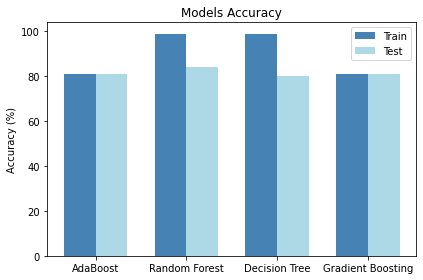

In [171]:
#Plots Accuracy

labels = ['AdaBoost', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
data1 = [AB_acc_train, RFC_acc_train, DT_acc_train, GBC_acc_train]
data2 = [AB_acc_test, RFC_acc_test, DT_acc_test, GBC_acc_test]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data1, width, color = 'steelblue', label='Train')
rects2 = ax.bar(x + width/2, data2, width, color = 'lightblue', label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_title('Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
        
fig.tight_layout()

plt.show()


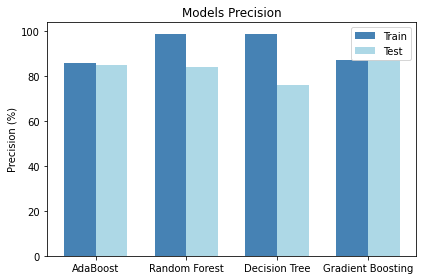

In [172]:
#Plots Precision

labels = ['AdaBoost', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
data1 = [AB_prec_train, RFC_prec_train, DT_prec_train, GBC_prec_train]
data2 = [AB_prec_test, RFC_prec_test, DT_prec_test, GBC_prec_test]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data1, width, color = 'steelblue', label='Train')
rects2 = ax.bar(x + width/2, data2, width, color = 'lightblue', label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision (%)')
ax.set_title('Models Precision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
        
fig.tight_layout()

plt.show()


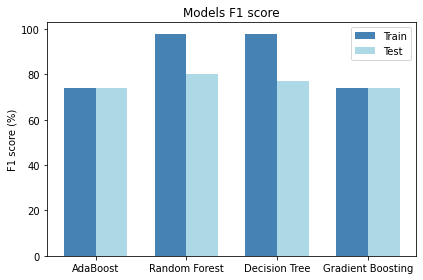

In [173]:
#Plots F1

labels = ['AdaBoost', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
data1 = [AB_f1_train, RFC_f1_train, DT_f1_train, GBC_f1_train]
data2 = [AB_f1_test, RFC_f1_test, DT_f1_test, GBC_f1_test]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data1, width, color = 'steelblue', label='Train')
rects2 = ax.bar(x + width/2, data2, width, color = 'lightblue', label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 score (%)')
ax.set_title('Models F1 score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
        
fig.tight_layout()

plt.show()
